## COVID-19 Data Analysis
### 1. Importing the Data
- The dataset is from the "Our World in Data" website.

In [8]:
import pandas as pd

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_data = pd.read_csv(url)

### 2. Exploratory Data Analysis (EDA)
- Here to plot a time series data of daily new cases for some selected countries.
- To understand the data by checking its basic information and statistics. 

In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Basic info
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321904 entries, 0 to 321903
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    321904 non-null  object 
 1   continent                                   306628 non-null  object 
 2   location                                    321904 non-null  object 
 3   date                                        321904 non-null  object 
 4   total_cases                                 284841 non-null  float64
 5   new_cases                                   313024 non-null  float64
 6   new_cases_smoothed                          311765 non-null  float64
 7   total_deaths                                263845 non-null  float64
 8   new_deaths                                  313099 non-null  float64
 9   new_deaths_smoothed                         311869 non-null  float64
 

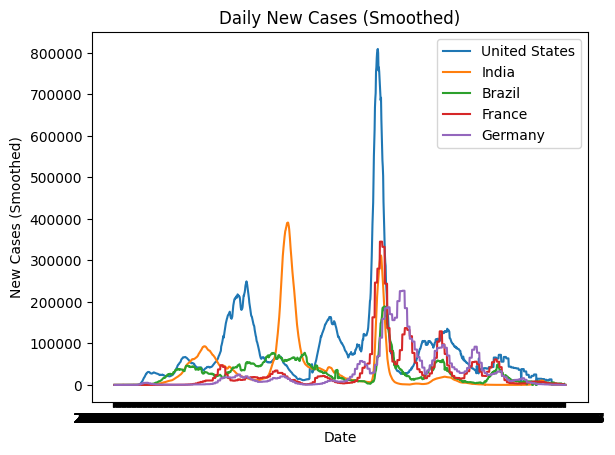

In [10]:
# Checking daily new cases for some countries
selected_countries = ['United States', 'India', 'Brazil', 'France', 'Germany']

for country in selected_countries:
    country_data = covid_data[covid_data['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases_smoothed'], label=country)

plt.xlabel('Date')
plt.ylabel('New Cases (Smoothed)')
plt.title('Daily New Cases (Smoothed)')
plt.legend()
plt.show()

### 3. Data Cleaning
- Handle missing values, inconsistencies, or any errors in the dataset.
- Dropping rows with missing total_cases and new_cases

In [11]:
covid_data = covid_data.dropna(subset=['total_cases', 'new_cases'])

### 4. Feature Engineering and Selection
- Create new features if needed and select the ones you'll use for your analysis.
- Here create a new feature 'case_fatality_rate'

In [5]:
covid_data['case_fatality_rate'] = covid_data['total_deaths'] / covid_data['total_cases']

### 5. Analysis and Visualization
- Analyzing trends, correlations, or any patterns in the data. Create visualizations for these findings.
- Here's analysis of case fatality rate over time for selected countries

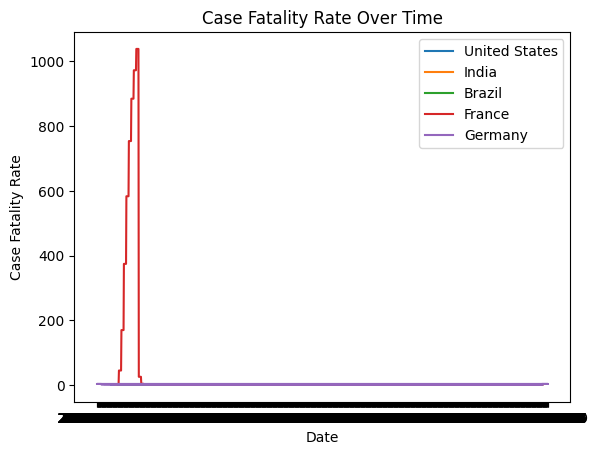

In [6]:
for country in selected_countries:
    country_data = covid_data[covid_data['location'] == country]
    plt.plot(country_data['date'], country_data['case_fatality_rate'], label=country)

plt.xlabel('Date')
plt.ylabel('Case Fatality Rate')
plt.title('Case Fatality Rate Over Time')
plt.legend()
plt.show()